In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_benchmark_and_annotate(filename, n_query, n_against):
    df = pd.read_csv(filename, sep='\t')
    df['n_query'] = int(n_query)
    df['n_against'] = int(n_against)
    
    return df

load_benchmark_and_annotate('benchmarks/a_100_vs_a.txt', 100, 10000)

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against
0,8046.1403,2:14:06,10401.48,58493.38,10403.37,10403.95,72282.79,7.61,378.65,30478.66,100,10000


In [3]:
query_line = [ load_benchmark_and_annotate(f"benchmarks/a_{x}_vs_a.txt", x, 10000) for x in range(100, 1000, 100) ]
#query_line.append(load_benchmark_and_annotate('benchmarks/a_vs_a.txt', 1000, 10000))
query_line_df = pd.concat(query_line)
query_line_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against
0,8046.1403,2:14:06,10401.48,58493.38,10403.37,10403.95,72282.79,7.61,378.65,30478.66,100,10000
0,6634.0672,1:50:34,10220.22,55552.64,10231.77,10232.34,60197.02,16.52,454.59,30161.81,200,10000
0,6791.2807,1:53:11,10283.14,50499.57,10275.11,10275.26,57833.04,23.31,448.54,30472.00,300,10000
0,5399.0796,1:29:59,10114.58,46904.75,10116.12,10116.37,47400.44,29.00,562.59,30399.56,400,10000
0,7236.9012,2:00:36,10306.49,58546.62,10235.79,10236.42,64539.15,35.26,446.27,32299.50,500,10000
0,8307.0373,2:18:27,10262.73,54648.19,10253.57,10254.16,69524.23,42.31,404.21,33580.93,600,10000
0,5935.0510,1:38:55,10436.12,51007.27,10450.90,10451.52,54838.95,50.85,562.69,33401.60,700,10000
0,6634.9251,1:50:34,10577.44,45540.72,10551.79,10552.37,57337.78,58.04,527.36,34999.19,800,10000
0,6092.0311,1:41:32,10244.95,45939.66,10276.76,10277.33,52401.86,66.00,595.16,36253.98,900,10000


In [4]:
against_line = [ load_benchmark_and_annotate(f"benchmarks/a_vs_a_{x}.txt", 1000, x) for x in range(1000, 10000, 1000) ]
#against_line.append(load_benchmark_and_annotate('benchmarks/a_vs_a.txt', 1000, 10000))
against_line_df = pd.concat(against_line)
against_line_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against
0,190.5965,0:03:10,7835.11,13411.27,7682.85,7684.71,23.64,6.94,1537.50,2934.33,1000,1000
0,492.1393,0:08:12,9266.73,19072.92,9177.62,9178.36,2893.39,14.18,1306.44,6433.30,1000,2000
0,337.1346,0:05:37,9214.48,14774.27,8796.72,8800.22,221.05,21.63,2495.44,8417.19,1000,3000
0,1816.7844,0:30:16,10261.88,28934.04,10212.58,10213.18,17020.83,28.87,762.82,13863.96,1000,4000
0,4308.3585,1:11:48,10222.42,39749.15,10243.16,10243.61,40409.38,36.60,447.18,19284.64,1000,5000
0,630.2757,0:10:30,14661.50,21440.07,11802.65,11805.98,56128.57,43.01,2918.98,18401.39,1000,6000
0,4486.2303,1:14:46,10387.06,41859.28,10400.46,10401.07,40213.93,51.11,578.58,25962.25,1000,7000
0,5241.6019,1:27:21,10062.63,46267.62,10062.45,10062.98,0.00,0.00,565.28,29627.37,1000,8000
0,5638.5937,1:33:58,10485.32,43337.22,10510.07,10510.71,49704.38,66.75,577.80,32585.03,1000,9000


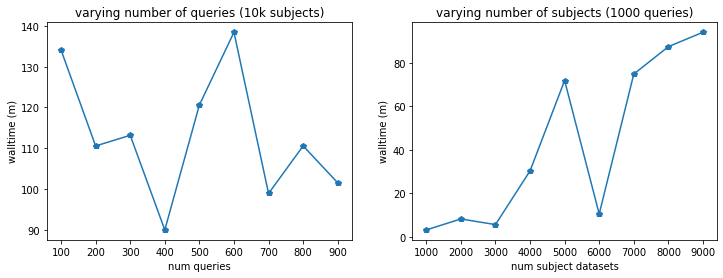

In [14]:
#fig = plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
ax.plot(query_line_df.n_query, query_line_df['s'] / 60, '-p')
#ax.axis(xmin=0, ymin=0, ymax=35)
ax.set_xlabel('num queries')
ax.set_ylabel('walltime (m)')
ax.set_title('varying number of queries (10k subjects)')

ax = axs[1]
ax.plot(against_line_df.n_against, against_line_df['s'] / 60, '-p')
#ax.axis(xmin=0, ymin=0, ymax=35)
ax.set_xlabel('num subject datasets')
ax.set_ylabel('walltime (m)')
ax.set_title('varying number of subjects (1000 queries)')

plt.savefig('subsample_benchmarks.svg')

In [6]:
def load_benchmark_replicate(filename, ident):
    df = pd.read_csv(filename, sep='\t')
    df['ident'] = ident
    
    return df

replicates_df = [ load_benchmark_replicate(f"benchmarks/a_vs_{x}.txt", x) for x in ('a','b','c','d','e')]
#query_line.append(load_benchmark_and_annotate('benchmarks/a_vs_a.txt', 1000, 10000))
replicates_df = pd.concat(replicates_df)
replicates_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,ident
0,6410.4036,1:46:50,10456.73,46762.75,10474.48,10474.75,54614.34,73.48,586.18,37592.65,a
0,10972.9724,3:02:52,10129.77,56932.70,10109.43,10110.02,84926.57,72.73,331.31,36359.01,b
0,6546.8879,1:49:06,10403.43,52091.42,10226.46,10227.06,59158.95,73.10,530.59,34751.04,c
0,8474.0678,2:21:14,10509.81,55628.16,10474.58,10475.17,74463.39,72.83,430.85,36527.69,d
0,6643.4003,1:50:43,10399.51,47443.64,10452.64,10453.31,57368.30,76.80,530.69,35255.88,e


mean (minutes) 130.15910666666667, std 32.66056122524755


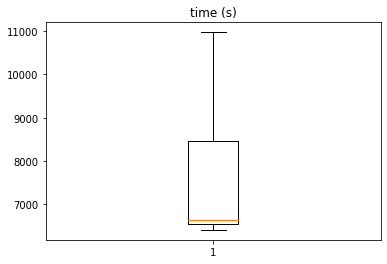

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(replicates_df.s)
ax.set_title('time (s)')

replicates_df['m'] = replicates_df['s'] / 60.0
print(f"mean (minutes) {replicates_df.m.mean()}, std {replicates_df.m.std()}")


mean 10379.85, std 146.8695632185236


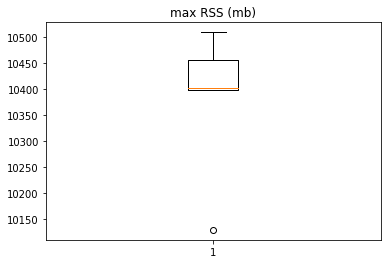

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(replicates_df.max_rss)
ax.set_title('max RSS (mb)')

print(f"mean {replicates_df.max_rss.mean()}, std {replicates_df.max_rss.std()}")


mean 66106.31, std 13045.372520597106


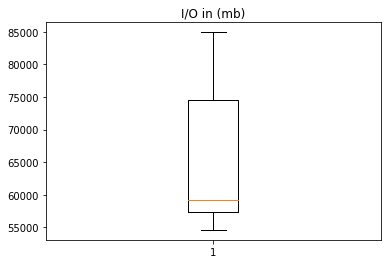

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(replicates_df.io_in)
ax.set_title('I/O in (mb)')

print(f"mean {replicates_df.io_in.mean()}, std {replicates_df.io_in.std()}")


In [10]:
def load_threads_benchmark_and_annotate(filename, n_threads):
    df = pd.read_csv(filename.format(threads=n_threads), sep='\t')
    df['threads'] = n_threads
    
    return df


x = [ load_threads_benchmark_and_annotate(f'benchmarks/a_vs_a_1000_t{t}.txt', t) for t in (4,8,16) ]
x.append(load_threads_benchmark_and_annotate(f'benchmarks/a_vs_a_1000.txt', 32))

threads_df = pd.concat(x)

In [11]:
threads_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,threads
0,635.5993,0:10:35,2276.08,10742.91,2258.54,2263.37,0.00,7.33,376.03,2394.75,4
0,366.8955,0:06:06,3893.58,13670.58,3891.74,3894.74,106.28,7.14,658.99,2422.29,8
0,241.8623,0:04:01,4217.00,13616.37,4178.51,4181.75,0.00,7.04,1126.57,2729.88,16
0,190.5965,0:03:10,7835.11,13411.27,7682.85,7684.71,23.64,6.94,1537.50,2934.33,32


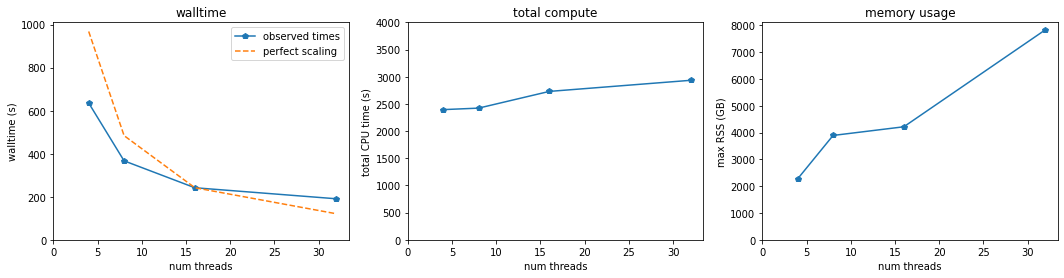

In [12]:
#fig = plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

ax = axs[0]
ax.plot(threads_df.threads, threads_df.s, '-p', label='observed times')
ax.plot([4, 8, 16, 32], [484 * 2, 484, 484 / 2, 484 / 4], '--', label='perfect scaling')
ax.axis(xmin=0, ymin=0)
ax.set_xlabel('num threads')
ax.set_ylabel('walltime (s)')
ax.set_title('walltime')
ax.legend(loc='upper right')

ax = axs[1]
ax.plot(threads_df.threads, threads_df.cpu_time, '-p')
ax.axis(xmin=0, ymin=0, ymax=4000)
ax.set_xlabel('num threads')
ax.set_ylabel('total CPU time (s)')
ax.set_title('total compute')

ax = axs[2]
ax.plot(threads_df.threads, threads_df.max_rss, '-p')
ax.axis(xmin=0, ymin=0)
ax.set_xlabel('num threads')
ax.set_ylabel('max RSS (GB)')
ax.set_title('memory usage')

plt.savefig('basic_benchmarks.svg')